In [2]:
from c19analysis import *
import cpnCommonlib as cpn
cpn.setup_figures(plt)

In [3]:
today = pd.to_datetime('10/08/2020')
path = '../'
filename = 'us-counties.csv'
fnamesta = 'us-states.csv'
data=pd.read_csv(path+filename,error_bad_lines=False)
data_st=pd.read_csv(path+fnamesta,error_bad_lines=False)
OH_sur = {'Lorain':39093,'Medina':39103,'Summit':39153,'Portage':39133,'Geauga':39055,'Lake':39085}
our_sur ={'Harford':24025,'Baltimore city':24510,	'Carroll':24013,'Howard':24027,'Anne Arundel':24003,'York':42133,'Montgomery':24031} #York in PA
    

## Total number of cases by state

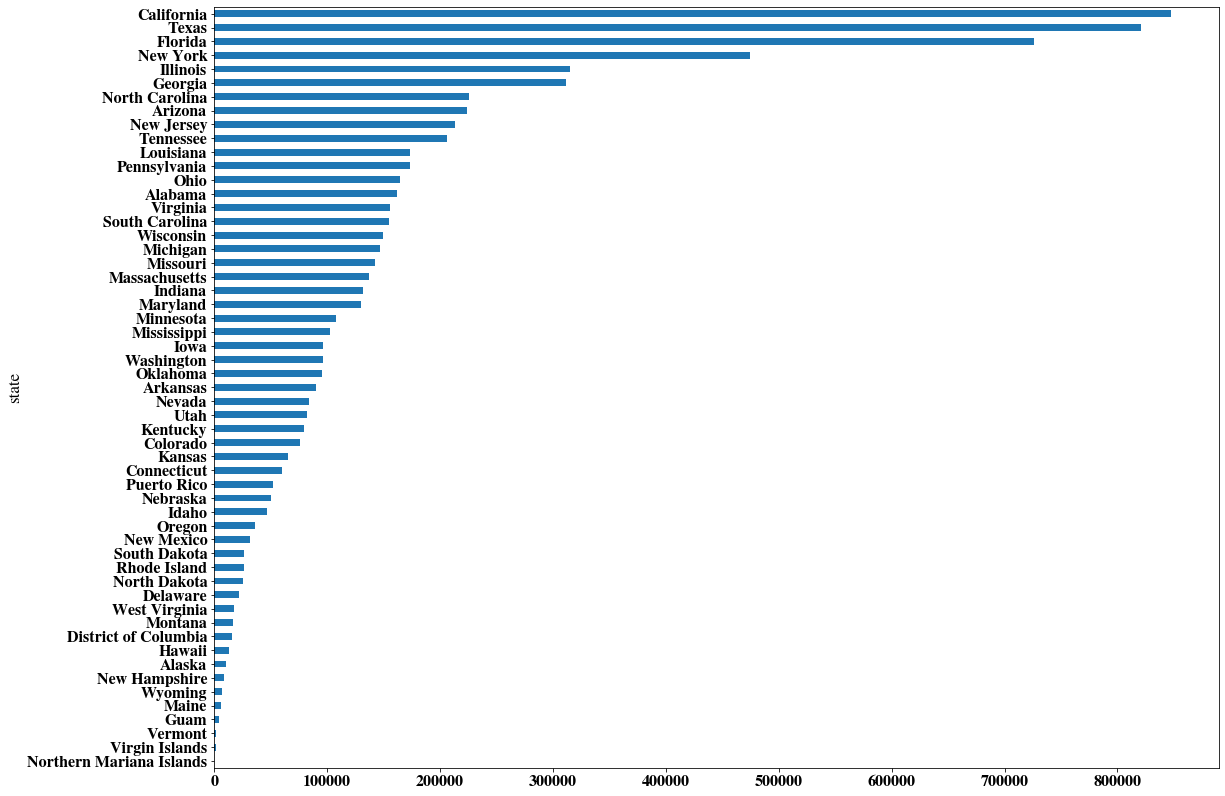

In [4]:
byst_cases=data_st.groupby('date').get_group(today.strftime("%Y-%m-%d")).groupby('state').cases.sum().sort_values()
fig4,ax4=plt.subplots(figsize=(18,14))
byst_cases.plot(kind="barh", ax=ax4)

In [5]:
byst_cases

state
Northern Mariana Islands        75
Virgin Islands                1324
Vermont                       1838
Guam                          3903
Maine                         5639
Wyoming                       7092
New Hampshire                 8878
Alaska                        9919
Hawaii                       13297
District of Columbia         15765
Montana                      16766
West Virginia                17325
Delaware                     21682
North Dakota                 25388
Rhode Island                 26045
South Dakota                 26441
New Mexico                   31756
Oregon                       36121
Idaho                        46848
Nebraska                     50059
Puerto Rico                  52294
Connecticut                  59748
Kansas                       65234
Colorado                     76186
Kentucky                     79550
Utah                         81975
Nevada                       83971
Arkansas                     90145
Oklahoma      

/home/cpnhere/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/cpnhere/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/cpnhere/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

2020-10-08containment_test_top5.png SAVED.


Replace existing file?:  y


Top-5.png SAVED.


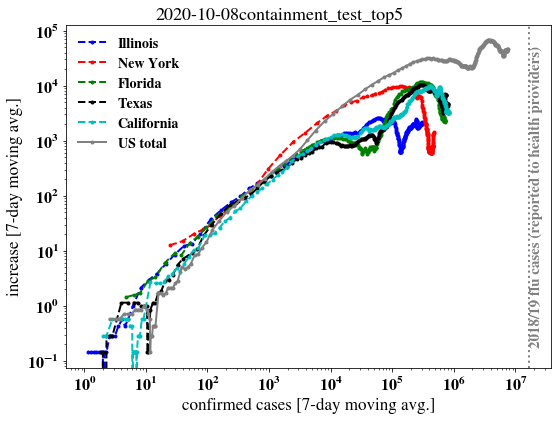

In [6]:
cpn.setup_figures(plt)
top5 = byst_cases.keys()[-5:]
fig4,ax4 = plt.subplots(figsize=(8,6))
fig4_ttl = str(today.date())+"containment_test_top5"
clrs=['b','r','g','k','c']
for sts in np.arange(top5.size):
    confirmed_cases_vs_increase_state(data_st,top5[sts],fig4,ax4,clr=clrs[sts],lns='.--',moving_window=7)
confirmed_cases_vs_increase_US(data_st,ax4,moving_window=7)
ax4.axvline(16.5e6,ls=':',color='grey')
ax4.annotate('2018/19 flu cases (reported to health providers)',xy=(17e6,0.2),color='grey',rotation=90)
ax4.set_xlabel('confirmed cases [7-day moving avg.]')
ax4.set_ylabel('increase [7-day moving avg.]')
ax4.legend()
fig4.suptitle(fig4_ttl)
fig4.tight_layout(rect=[0,0,1,0.98])
#fig4.show()
savefig(fig4,fig4_ttl)
savefig(fig4,'Top-5')

## Summit

/home/cpnhere/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/cpnhere/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/cpnhere/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

2020-10-08_containment_test_Summit_daily.png SAVED.


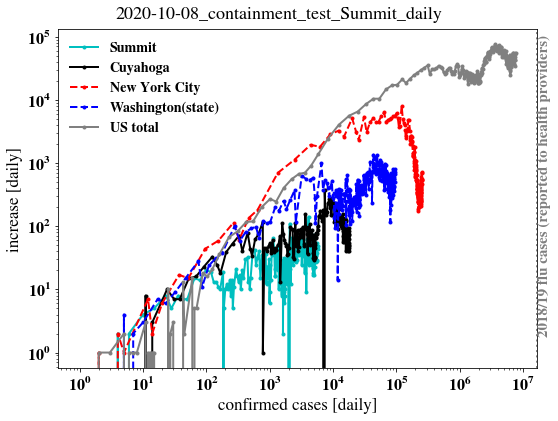

In [7]:
#Containment (Summit)
fig3,ax3 = plt.subplots(figsize=(8,6))
fig3_ttl = str(today.date())+'_containment_test_Summit_daily'
confirmed_cases_vs_increase(data,'Summit',39153,fig3,ax3,clr='c',lns='.-')
confirmed_cases_vs_increase(data,'Cuyahoga',39035,fig3,ax3,clr='k',lns='.-')
confirmed_cases_vs_increase(data,'New York City',np.nan,fig3,ax3,clr='r',lns='.--')
confirmed_cases_vs_increase_state(data_st,'Washington',fig3,ax3,clr='b',lns='.--')
confirmed_cases_vs_increase_US(data_st,ax3)
ax3.axvline(16.5e6,ls=':',color='grey')
ax3.annotate('2018/19 flu cases (reported to health providers)',xy=(17e6,2),color='grey',rotation=90)
ax3.set_xlabel('confirmed cases [daily]')
ax3.set_ylabel('increase [daily]')
ax3.legend()
fig3.suptitle(fig3_ttl)
fig3.tight_layout(rect=[0,0,1,0.98])
savefig(fig3,fig3_ttl)

/home/cpnhere/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/cpnhere/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/cpnhere/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

2020-10-08_containment_test_Summit_7day.png SAVED.


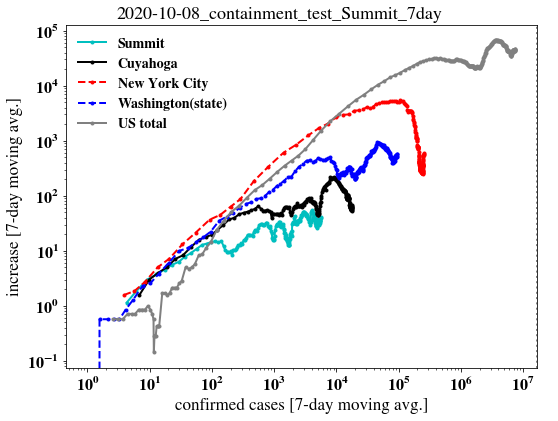

In [8]:
#Containment (Summit)
fig3,ax3 = plt.subplots(figsize=(8,6))
fig3_ttl = str(today.date())+'_containment_test_Summit_7day'
confirmed_cases_vs_increase(data,'Summit',39153,fig3,ax3,clr='c',lns='.-',moving_window=7)
confirmed_cases_vs_increase(data,'Cuyahoga',39035,fig3,ax3,clr='k',lns='.-',moving_window=7)
confirmed_cases_vs_increase(data,'New York City',np.nan,fig3,ax3,clr='r',lns='.--',moving_window=7)
confirmed_cases_vs_increase_state(data_st,'Washington',fig3,ax3,clr='b',lns='.--',moving_window=7)
confirmed_cases_vs_increase_US(data_st,ax3,moving_window=7)
ax3.axvline(16.5e6,ls=':',color='grey')
ax3.annotate('2018/19 flu cases (reported to health providers)',xy=(17e6,0.2),color='grey',rotation=90)
ax3.set_xlabel('confirmed cases [7-day moving avg.]')
ax3.set_ylabel('increase [7-day moving avg.]')
ax3.legend()
fig3.suptitle(fig3_ttl)
fig3.tight_layout(rect=[0,0,1,0.98])
savefig(fig3,fig3_ttl)

## Baltimore

/home/cpnhere/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/cpnhere/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/cpnhere/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

2020-10-08_containment_test_Baltimore_daily.png SAVED.


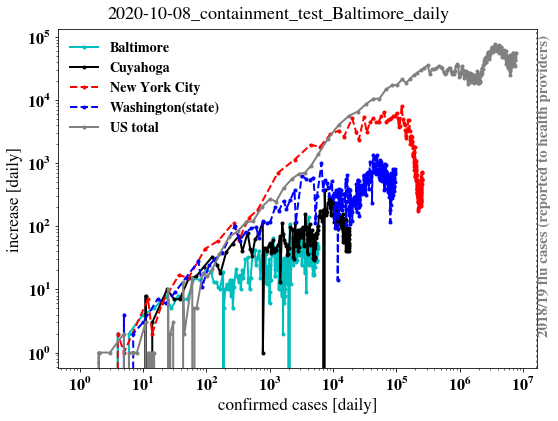

In [9]:
#Containment (Baltimore)
fig3,ax3 = plt.subplots(figsize=(8,6))
fig3_ttl = str(today.date())+'_containment_test_Baltimore_daily'
confirmed_cases_vs_increase(data,'Baltimore',39153,fig3,ax3,clr='c',lns='.-')
confirmed_cases_vs_increase(data,'Cuyahoga',39035,fig3,ax3,clr='k',lns='.-')
confirmed_cases_vs_increase(data,'New York City',np.nan,fig3,ax3,clr='r',lns='.--')
confirmed_cases_vs_increase_state(data_st,'Washington',fig3,ax3,clr='b',lns='.--')
confirmed_cases_vs_increase_US(data_st,ax3)
ax3.axvline(16.5e6,ls=':',color='grey')
ax3.annotate('2018/19 flu cases (reported to health providers)',xy=(17e6,2),color='grey',rotation=90)
ax3.set_xlabel('confirmed cases [daily]')
ax3.set_ylabel('increase [daily]')
ax3.legend()
fig3.suptitle(fig3_ttl)
fig3.tight_layout(rect=[0,0,1,0.98])
savefig(fig3,fig3_ttl)

/home/cpnhere/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/cpnhere/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/cpnhere/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

2020-10-08_containment_test_Baltimore_7day.png SAVED.


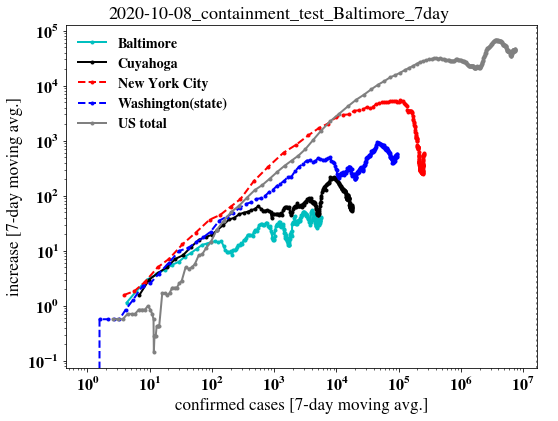

In [10]:
#Containment (Baltimore)
fig3,ax3 = plt.subplots(figsize=(8,6))
fig3_ttl = str(today.date())+'_containment_test_Baltimore_7day'
confirmed_cases_vs_increase(data,'Baltimore',39153,fig3,ax3,clr='c',lns='.-',moving_window=7)
confirmed_cases_vs_increase(data,'Cuyahoga',39035,fig3,ax3,clr='k',lns='.-',moving_window=7)
confirmed_cases_vs_increase(data,'New York City',np.nan,fig3,ax3,clr='r',lns='.--',moving_window=7)
confirmed_cases_vs_increase_state(data_st,'Washington',fig3,ax3,clr='b',lns='.--',moving_window=7)
confirmed_cases_vs_increase_US(data_st,ax3,moving_window=7)
ax3.axvline(16.5e6,ls=':',color='grey')
ax3.annotate('2018/19 flu cases (reported to health providers)',xy=(17e6,0.2),color='grey',rotation=90)
ax3.set_xlabel('confirmed cases [7-day moving avg.]')
ax3.set_ylabel('increase [7-day moving avg.]')
ax3.legend()
fig3.suptitle(fig3_ttl)
fig3.tight_layout(rect=[0,0,1,0.98])
savefig(fig3,fig3_ttl)